In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# zscore
from scipy.stats import zscore
# scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import *
# partitioning
from sklearn.model_selection import train_test_split
# naive bayes
from sklearn.naive_bayes import GaussianNB, CategoricalNB
# plot things
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve

In [2]:
df = pd.read_csv("ravdess_features.csv")

## Classification

### Choice of attributes

Each of us select a classification method and then select two variables, one to be classified by ourselves and one to be compared with the other methods, as clustering.
Classification methods:

* Naive Bayes - Claudio
* kNN - Andrea
* Decision trees - Steffania

Possible variables:

* Categorical: emotion, sex
* Numerical: intensity

## Partitioning

In [3]:
df_num = df.drop(columns = ["modality", "vocal_channel", "emotional_intensity", "statement", "repetition", "actor", "channels", "frame_width"]).dropna()
df_num.T

,0,2,3,4,5,7,8,13,14,15,...,2438,2439,2440,2441,2442,2443,2446,2448,2450,2451
emotion,fearful,happy,surprised,happy,fearful,neutral,calm,calm,sad,sad,...,fearful,calm,neutral,sad,sad,calm,sad,calm,surprised,neutral
sex,F,F,F,F,F,F,F,F,F,F,...,M,M,M,M,M,M,M,M,M,M
sample_width,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
frame_rate,48000,48000,48000,48000,48000,48000,48000,48000,48000,48000,...,48000,48000,48000,48000,48000,48000,48000,48000,48000,48000
length_ms,3737,4671,3637,4404,3570,3437,3770,4504,5038,4872,...,3170,3504,3504,5305,4872,3837,5005,4171,3737,3837
frame_count,179379.0,224224.0,174575.0,211411.0,171371.0,164965.0,180981.0,216216.0,241842.0,233833.0,...,152152.0,168168.0,168168.0,254655.0,233834.0,184184.0,240240.0,200200.0,179379.0,184184.0
intensity,-36.793432,-32.290737,-49.019839,-31.214503,-36.312244,-49.095042,-45.906837,-54.745974,-43.82335,-35.549252,...,-48.653291,-43.782281,-43.906073,-26.666414,-29.512788,-47.141749,-36.811776,-43.342901,-45.751265,-40.018044
zero_crossings_sum,16995,18723,11617,15137,12143,11147,15293,13640,15485,15125,...,8648,8122,13087,11755,11043,10378,13981,8963,9716,9427
mfcc_mean,-33.485947,-30.532463,-36.059555,-31.405996,-30.500889,-36.048576,-33.899364,-34.821735,-38.21092,-32.44183,...,-30.060055,-26.460697,-26.366121,-20.926167,-22.787794,-28.68281,-24.80522,-31.160332,-28.242815,-29.019236
mfcc_std,134.65486,126.57711,159.72516,122.125824,132.58173,167.65213,159.19762,164.23001,151.0448,133.17375,...,166.5965,156.47433,149.74036,112.79364,113.3493,154.49243,138.31459,157.4997,159.9434,149.18895


In [4]:
y = np.array(df_num["emotion"])
categorical_cols = ["emotion", "sex"]
df_num = pd.get_dummies(df_num, columns=categorical_cols)
X = df_num.values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [5]:
# without stratify
print(np.unique(y, return_counts=True)[1] / len(y))
print(np.unique(y_train, return_counts=True)[1] / len(y_train))
print(np.unique(y_test, return_counts=True)[1] / len(y_test))

[0.15158924 0.15403423 0.08312958 0.15403423 0.150978   0.07823961
 0.14914425 0.07885086]
[0.1441048  0.15196507 0.07423581 0.15982533 0.14585153 0.07947598
 0.16943231 0.07510917]
[0.16904277 0.15885947 0.10386965 0.14052953 0.16293279 0.07535642
 0.10183299 0.08757637]


In [6]:
# with stratify
print(np.unique(y, return_counts=True)[1] / len(y))
print(np.unique(y_train, return_counts=True)[1] / len(y_train))
print(np.unique(y_test, return_counts=True)[1] / len(y_test))

[0.15158924 0.15403423 0.08312958 0.15403423 0.150978   0.07823961
 0.14914425 0.07885086]
[0.1441048  0.15196507 0.07423581 0.15982533 0.14585153 0.07947598
 0.16943231 0.07510917]
[0.16904277 0.15885947 0.10386965 0.14052953 0.16293279 0.07535642
 0.10183299 0.08757637]


In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1145, 38) (491, 38) (1145,) (491,)


### Naive Bayes

In [8]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.52      0.69      0.59        83
        calm       0.69      0.54      0.60        78
     disgust       0.54      0.51      0.53        51
     fearful       0.62      0.38      0.47        69
       happy       0.46      0.40      0.43        80
     neutral       0.36      0.43      0.39        37
         sad       0.63      0.38      0.48        50
   surprised       0.32      0.65      0.43        43

    accuracy                           0.50       491
   macro avg       0.52      0.50      0.49       491
weighted avg       0.54      0.50      0.50       491



Low reliability of the model for the _emotion_ prediction.

In [9]:
clf.predict_proba(X_test)

array([[2.12971971e-05, 6.06375062e-01, 1.46611734e-01, ...,
        5.05311277e-02, 1.92110596e-01, 2.55637071e-04],
       [3.42829910e-05, 1.52121062e-01, 1.03038514e-01, ...,
        5.22270715e-01, 2.15714761e-01, 1.47204800e-03],
       [1.77547045e-02, 9.37615885e-06, 1.27121929e-26, ...,
        4.94078476e-12, 4.68415087e-08, 5.32432965e-21],
       ...,
       [3.71592264e-06, 1.98750968e-01, 1.35046635e-01, ...,
        4.99695478e-01, 1.57142813e-01, 8.73282478e-03],
       [1.72758390e-02, 2.09596582e-04, 1.36079508e-02, ...,
        2.43967590e-03, 7.99229912e-03, 7.61523253e-01],
       [1.32133858e-07, 4.37670777e-01, 6.31422313e-02, ...,
        3.07929432e-01, 1.66270322e-01, 2.47805357e-02]])

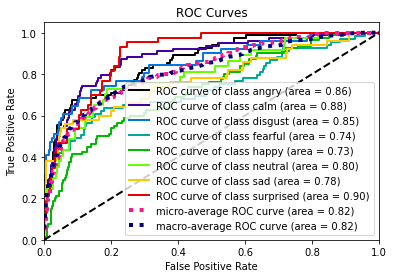

0.8174540744138168


In [10]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))

#### Categorical

In [67]:
non_cat_columns = [
    "intensity",
    "zero_crossings_sum",
    "length_ms",
    "frame_count",
    #"sample_width",
    #"frame_rate",
    "mfcc_mean",
    "mfcc_min",
    "mfcc_max",
    "mfcc_std",
    "sc_mean",
    #"sc_min",
    "sc_max",
    "sc_std",
    "sc_kur",
    "sc_skew",
    "stft_mean",
    #"stft_min",
    #"stft_max",
    "stft_std",
    "stft_kur",
    "stft_skew",
    "mean",
    "std",
    "min",
    "max",
    "skew",
    "kur"
]

X_noncat = df_num[non_cat_columns].values

X_train_noncat, X_test_noncat, y_train_noncat, y_test_noncat = train_test_split(
    X_noncat, y, test_size=0.3, stratify=y, random_state=0
)

# train and test set should be binned separately
X_train_cat = list()
for column_idx in range(X_train_noncat.shape[1]):
    X_train_cat.append(pd.qcut(X_train_noncat[:, column_idx], q=4, labels=False))
X_train_cat = np.array(X_train_cat).T

X_test_cat = list()
for column_idx in range(X_test_noncat.shape[1]):
    X_test_cat.append(pd.qcut(X_test_noncat[:, column_idx], q=4, labels=False))
X_test_cat = np.array(X_test_cat).T

print(X_train_cat.shape, X_test_cat.shape)

(1145, 23) (491, 23)


In [68]:
clf = CategoricalNB()
clf.fit(X_train_cat, y_train_noncat)
y_pred = clf.predict(X_test_cat)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.17      0.24      0.20        83
        calm       0.15      0.17      0.16        78
     disgust       0.16      0.10      0.12        51
     fearful       0.15      0.03      0.05        69
       happy       0.19      0.20      0.20        80
     neutral       0.06      0.08      0.07        37
         sad       0.12      0.12      0.12        50
   surprised       0.07      0.09      0.08        43

    accuracy                           0.14       491
   macro avg       0.13      0.13      0.12       491
weighted avg       0.14      0.14      0.13       491



Very low reliability as regards the prediction of _emotion_ on the Categorical.